# UFO Sightings Data Exploration

## Introduction

Welcome to this exploratory analysis of a dataset detailing UFO sightings. This project is a personal and informal endeavor, for the sake of curiosity and fun. The allure of the unknown, combined with the opportunity to showcase some data manipulation and visualization techniques, makes this an exciting project to share.

As a professional with a background in actuarial work and a strong academic foundation through my mathematics degree I have had a lot of exposure to working with data. My bachelor's degree, with a focus on statistics and modeling, involved a large amount of analysis of data, predominantly using R for data exploration but also making use of python for a second year project. Unfortunately the sensitive nature of my actuarial work prohibits sharing those analyses but again most of this work made use of R. However, now with this exploration I just wanted to spend an afternoon working with a fun dataset I found to see if I can pick up on any patterns. For example is there somehting that groups sightings together which could add credibility to the claims? Do geogrpahical regions tend to report the same shape of UFO, potentially leading to a further exploration of cultural influence on sigthings? These are the sort of questions I want to explore this afternoon.

This exploration is not only a means to indulge in a light-hearted topic that has some what captured my interest over the years, but also serves as a platform to demonstrate some of the analytical skills that are transferable across different domains, from the world of finance to the speculative realm of UFO sightings.

## Project Goals

- **Fun and Interest**: To explore a dataset that is out of the ordinary and sparks intrigue.
- **Skill Demonstration**: To utilize this analysis to demonstrate my capabilities in data manipulation, statistical analysis, and visualization.
- **Learning and Development**: To continue honing my skills in Python, leveraging libraries like pandas, matplotlib, scikit-learn and seaborn, as these are key tools for any data analyst and software developer.

In [12]:
# Importing the pandas library, a powerful tool for data manipulation and analysis.
import pandas as pd

# Defining the file path where the UFO sightings data is stored.
file_path = "./data/ufo-sightings-transformed.csv"

# Reading the dataset from the CSV file into a pandas DataFrame. This structure allows for easy data manipulation.
df = pd.read_csv(file_path)

# Dropping the first column of the DataFrame as it's an unnecessary index.
df.drop(columns=[df.columns[0]], inplace=True)

# Displaying the first five rows of the DataFrame to get an initial look at the data.
print(df.head())

# Displaying the DataFrame's information, including the non-null count and data type of each column, to understand the dataset's structure better.
print(df.info())

# Removing any rows with missing values to ensure the analysis is performed on complete data only.
df.dropna(inplace=True)

# Checking how many entries are left after dropping missing values
print(df.info())

             Date_time date_documented  Year  Month  Hour  Season  \
0  1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1  1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2  1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3  1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4  1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   

  Country_Code         Country   Region        Locale   latitude   longitude  \
0          USA   United States    Texas    San Marcos  29.883056  -97.941111   
1          USA   United States    Texas  Bexar County  29.384210  -98.581082   
2          GBR  United Kingdom  England       Chester  53.200000   -2.916667   
3          USA   United States    Texas          Edna  28.978333  -96.645833   
4          USA   United States   Hawaii       Kaneohe  21.418056 -157.803611   

  UFO_shape  length_of_encounter_seconds Encounter_Duration  \
0  Cylinder                       2700.0 

## Data Cleaning Summary

After importing and initial inspection of the UFO sightings dataset, we performed the following data cleaning steps:

1. **Dropped the Unnecessary Index Column**: This column was removed to simplify our dataset, focusing only on relevant information.
2. **Removed Rows with Missing Values**: By using `dropna()`, we ensured our analysis would only include complete records. This step reduced our dataset from 80,328 entries to 77,668 entries, indicating that we dropped rows with incomplete information to maintain the integrity of our analysis.

### Conclusion

The data cleaning process is a critical step in ensuring the quality of our analysis. By removing incomplete records, we now have a dataset that better represents fully documented UFO sightings. This cleaned dataset lays a solid foundation for further exploration, such as analyzing sighting trends over time, geographical distribution of sightings, or characteristics of the sightings (e.g., shapes, duration).

As we proceed, we'll explore these aspects to uncover interesting patterns and insights about UFO sightings. The goal is not only to satisfy our curiosity but also to practice and refine our data manipulation and analysis skills, crucial for my journey towards becoming a proficient software developer and data analyst.


In [2]:
# Identifying the top 15 countries with the highest number of UFO sightings and saving them into a list.
top_countries = df["Country"].value_counts()[0:15].index.tolist()
print(top_countries)

# Updating the 'Country' column to keep only the top 15 countries, categorizing all other countries as "Other".
df["Country"] = df["Country"].apply(lambda val: val if val in top_countries else "Other")

# Displaying the count of UFO sightings by country after categorization.
print(df["Country"].value_counts())


['United States', 'Canada', 'United Kingdom', 'Australia', 'India', 'Mexico', 'Germany', 'South Africa', 'Netherlands', 'New Zealand', 'Brazil', 'Spain', 'France', 'Ireland', 'China']
Country
United States     69137
Canada             3493
United Kingdom     2252
Other              1123
Australia           550
India               211
Mexico              205
Germany             116
South Africa         93
New Zealand          91
Netherlands          91
Brazil               76
Spain                70
France               65
Ireland              53
China                42
Name: count, dtype: int64


## UFO Sightings by Country Analysis

After cleaning our dataset, we concentrated on understanding the geographical distribution of UFO sightings. The analysis began by identifying the top 15 countries with the highest number of sightings. These countries are:

- United States, Canada, United Kingdom, Australia, India, Mexico, Germany, South Africa, Netherlands, New Zealand, Brazil, Spain, France, Ireland, China

This selection allows us to focus on regions with significant data while grouping the rest under an "Other" category to maintain a clean and manageable analysis scope.

### Conclusion

The results indicate a significant concentration of UFO sightings in the United States, far exceeding those in any other country. This could be attributed to a variety of factors, including population size, geographic area, or cultural aspects such as a higher propensity to report such events. However, I suspect it is most likely related to how the data is collected, though this dataset has been taken from kaggle the author did not link a source for the data, I assume this may be taken from an American institution which could cause bias to the results. I do also think pop culture has increased sightings in Western nations.

By categorizing less frequent countries as "Other," we've streamlined our dataset for more focused analysis. This simplification aids in visual representation and statistical analysis, allowing us to derive more meaningful insights into the global distribution of UFO sightings. Moving forward, this categorization could enable us to explore patterns, trends, and anomalies within the top 15 countries and compare them against the aggregated data of the rest of the world.

This step exemplifies the importance of data preprocessing and simplification in data analysis, making it easier to visualize and interpret the data, especially when dealing with large datasets. Delving deeper into the dataset, these insights could form the basis for more complex analyses, such as temporal trends or sighting durations in these key geographical locations.


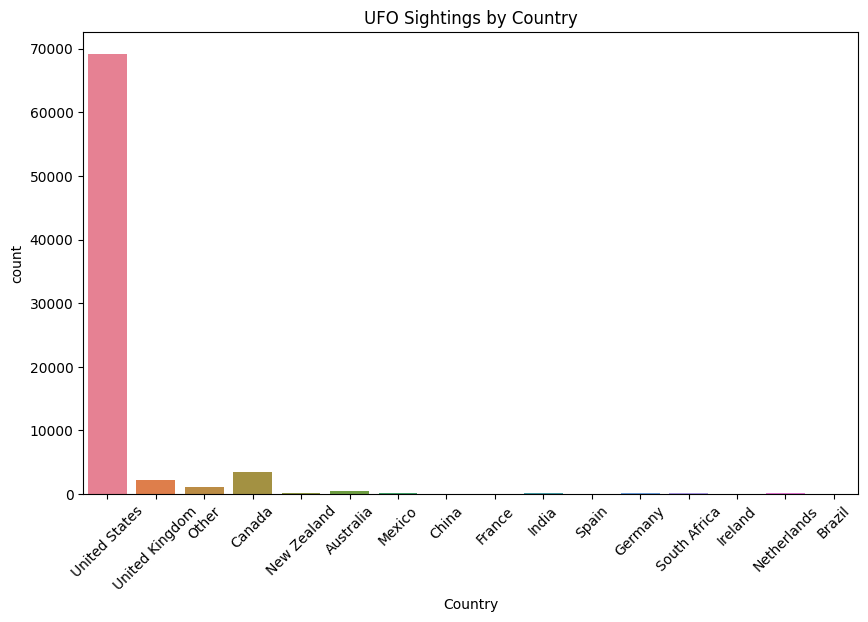

In [10]:
# Importing the required libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a count plot using seaborn to show the number of UFO sightings by country.
# sns.countplot automatically counts the occurrences of each category.
# Setting hue to the 'Country' itself, which will color code each country differently.
sns.countplot(data=df, x='Country', hue='Country', legend=False)

# Rotating the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adding a title to the plot.
plt.title('UFO Sightings by Country')

# Displaying the plot.
plt.show()


## Visualizing UFO Sightings by Country

The bar chart above illustrates the distribution of UFO sightings across different countries, with the data categorized to highlight the top 15 countries.

### Observations

- The **United States** has a disproportionately high number of reported UFO sightings compared to other countries, which could be due to a combination of factors which we mentioned above.
- Other countries like **Canada**, the **United Kingdom**, and **Australia** also show a significant number of sightings, but they pale in comparison to the US.
- The rest of the countries on the list show a relatively similar and lower count of sightings, which could again be due to many factors (maybe even a lower true number of occurences...).

### Conclusion

This visualization serves not only to exhibit the disparity in UFO sighting reports but also raises questions about the underlying reasons for such differences. It could prompt further investigation into the sociocultural factors that influence the reporting of UFO sightings, or perhaps into the methodology of data collection itself (are mostly US reports being collected here).

To enhance the readability and visual appeal of the chart, we have introduced a hue that assigns a unique color to each country, making it easier to differentiate between them at a glance. This step demonstrates how the proper use of color can enhance the interpretability of data visualizations, an important consideration for anyone in the field of data analysis and software development.


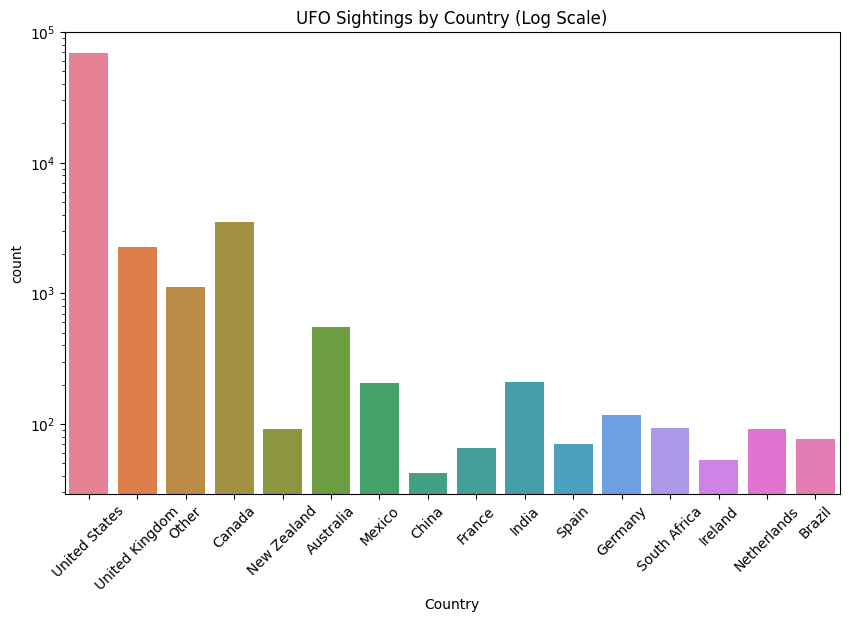

In [11]:
# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a count plot using seaborn to show the number of UFO sightings by country.
# sns.countplot automatically counts the occurrences of each category.
# Setting hue to the 'Country' itself, which will color code each country differently.
sns.countplot(data=df, x='Country', hue='Country', legend=False)

# Rotating the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Setting the y-axis to a logarithmic scale to better visualize the differences between countries with smaller counts.
plt.yscale('log')

# Adding a title to the plot.
plt.title('UFO Sightings by Country (Log Scale)')

# Displaying the plot.
plt.show()

## Enhanced Visualization of UFO Sightings by Country

The modified bar chart above employs a logarithmic scale on the y-axis to provide a clearer view of the distribution of UFO sightings by country.

### Observations

- The use of a log scale illuminates the disparities between countries that were not as evident in the linear scale. Countries with fewer sightings are now easier to compare.
- While the **United States** still leads by a significant margin, the logarithmic scale allows us to observe the relative differences between the other countries more clearly.

### Conclusion

This visualization strategy is particularly useful when dealing with data that varies exponentially. It underscores the importance of choosing the right scale for your data to effectively communicate the story behind the numbers. As we continue our analysis, we can consider employing similar techniques to uncover patterns that might be hidden at first glance due to the scale of the data. This approach is a testament to the power of thoughtful data visualization in the field of data analysis.

Next steps could involve examining other factors, such as the time of year or the specific regions within these countries, to gain a more nuanced understanding of the data. This process is not just about creating visualizations, but about crafting a narrative that can be followed and understood, revealing the insights our data holds.


[1910, 1916, 1920, 1925, 1929, 1930, 1931, 1933, 1934, 1936, 1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


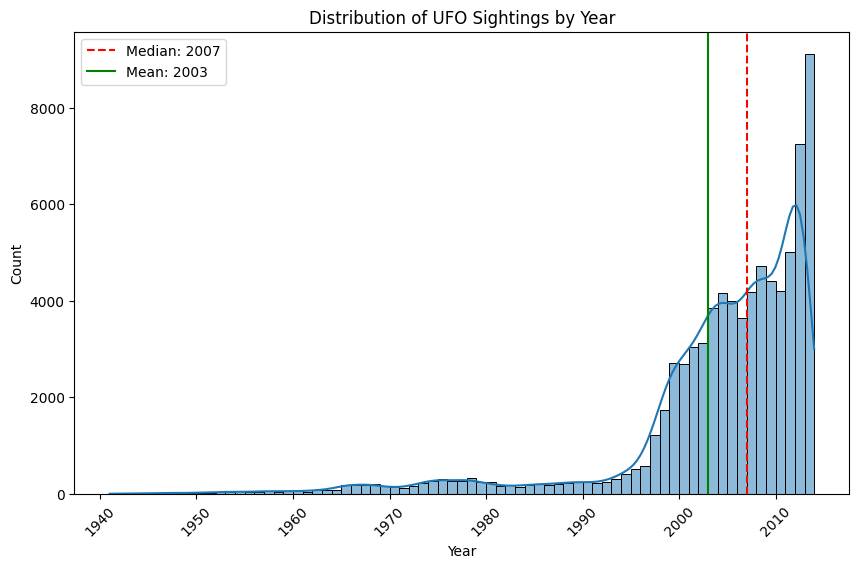

In [17]:
# Display the different years in which a UFO sighting was reported in ascending order
print(sorted(df["Year"].unique()))

# Filtering the dataframe to consider only entries from the year 1941 onwards since we want little gaps in our data (don't want to include years where nothing was reported)
filtered_df = df[df.Year >= 1941]

# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a histogram to show the distribution of UFO sightings by year with a kernel density estimate (KDE).
sns.histplot(filtered_df['Year'], kde=True, binwidth=1)

# Calculating the median year of UFO sightings and plotting a red dashed vertical line at this value.
median = int(filtered_df['Year'].median())
plt.axvline(median, color='r', linestyle='--', label=f'Median: {median}')

# Calculating the mean year of UFO sightings and plotting a green solid vertical line at this value.
mean = int(filtered_df['Year'].mean())
plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean}')

# Rotating the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adding a title to the plot and displaying the legend.
plt.title('Distribution of UFO Sightings by Year')
plt.legend()

# Displaying the plot.
plt.show()


## Statistical Analysis of UFO Sightings by Year

The histogram above visualizes the frequency of UFO sightings reports by year, starting from 1940. The visualization includes a kernel density estimate (KDE) curve, which gives us a smooth approximation of the distribution.

### Observations

- The distribution shows an increasing trend in the number of reported sightings over the years, with noticeable growth starting in the late 20th century.
- The median year of sightings (marked by the red dashed line) is **2007**, indicating that half of the reported sightings occurred after this year.
- The mean year of sightings (marked by the green solid line) is **2003**, suggesting that while the latter half of the dataset contains more frequent reports, the average is pulled earlier due to lower counts in the earlier years.

### Conclusion

This analysis highlights a potential increase in either the occurrence or the reporting of UFO sightings in more recent years. The upward trend could be attributed to various factors, such as advancements in technology making reporting easier, increased public interest, or even changes in social attitudes towards discussing such events.

The difference between the mean and median years also suggests a right-skewed distribution, which is characteristic of phenomena that increase in frequency over time. Such insights could pave the way for further investigations into the sociocultural factors influencing this trend, as well as into the quality and methods of data collection over the years.

As we continue to explore this dataset, we can keep these statistical indicators in mind as reference points for more nuanced inquiries, such as the correlation between specific events or technological advancements and the frequency of reported sightings. Understanding the data's distribution is key to forming a comprehensive view of the context surrounding these events.


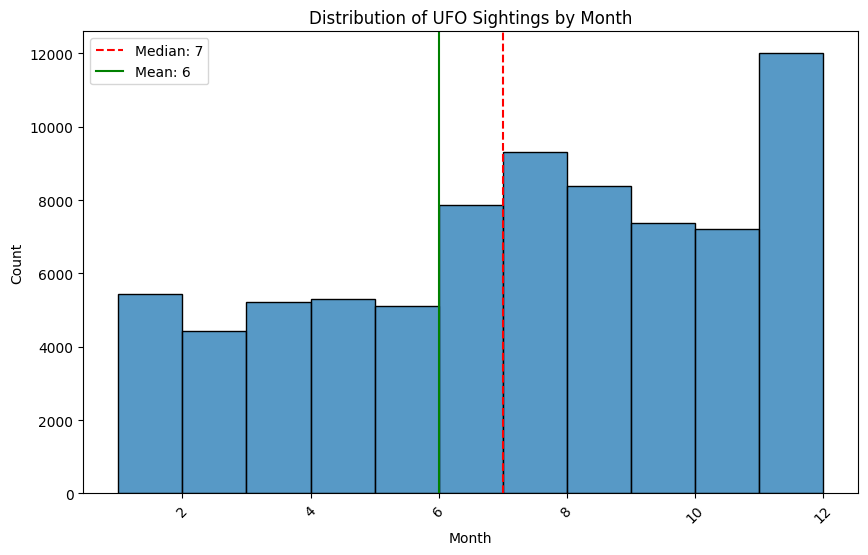

In [18]:
# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a histogram to show the distribution of UFO sightings by month.
sns.histplot(filtered_df['Month'], kde=False, binwidth=1)

# Calculating the median month of UFO sightings and plotting a red dashed vertical line at this value.
median = int(filtered_df['Month'].median())
plt.axvline(median, color='r', linestyle='--', label=f'Median: {median}')

# Calculating the mean month of UFO sightings and plotting a green solid vertical line at this value.
mean = int(filtered_df['Month'].mean())
plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean}')

# Rotating the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adding a title to the plot and displaying the legend.
plt.title('Distribution of UFO Sightings by Month')
plt.legend()

# Displaying the plot.
plt.show()

## Monthly Trends in UFO Sightings

The bar chart above displays the frequency of UFO sightings reports by month, providing insight into any potential seasonal trends.

### Observations

- There is a noticeable increase in sightings during the summer months, however, December has the highest count.
- The median month (marked by the red dashed line) is **7 (July)**, which indicates that more than half of the sightings are reported from July onwards.
- The mean month (marked by the green solid line) is approximately **6 (June)**, suggesting that on average, the reported sightings peak around the middle of the year.

### Conclusion

The concentration of reports during the summer months could be due to several factors such as clearer night skies, more recreational outdoor activities, or increased leisure time during which people are more likely to observe and report unusual phenomena.

However, the peak in December is slightly harder to explain, but this again could be due to longer nights during this period and sometimes clearer night skies. This seems odd due to the massive drop off in January thoguh, so maybe the holiday season can evoke more psychological factors by making people feel more wonder and curisoty, or maybe just the increase in alcohol consumption...

The difference between the mean and median is minimal, indicating a relatively symmetrical distribution of sightings throughout the year, with a slight skew towards the latter half. This pattern invites further investigation into how seasonal variables may influence both the occurrence and the likelihood of reporting UFO sightings.

Understanding these patterns is essential as they could inform the planning of resource allocation for UFO research organizations or contribute to broader studies on public reporting behavior related to unexplained phenomena.


In [54]:
# Creating a new DataFrame for machine learning purposes with selected features.
Ml_df = filtered_df[["Year","Month","Hour","Season","latitude","longitude","UFO_shape","length_of_encounter_seconds"]].copy()

# Identifying the top 21 UFO shapes based on their frequency of appearance.
top_shapes = Ml_df["UFO_shape"].value_counts()[0:21].index.tolist()

# Updating the 'UFO_shape' column to only include these top shapes, categorizing all others as "Other".
Ml_df["UFO_shape"] = Ml_df["UFO_shape"].apply(lambda val: val if val in top_shapes else "Other")

# Printing the length of the DataFrame to see how many entries it contains.
print(len(Ml_df))

# Filtering out extreme outlier data in 'length_of_encounter_seconds' to keep the analysis robust.
Ml_df = Ml_df[Ml_df["length_of_encounter_seconds"] < 6000]

# Printing the length of the DataFrame again to see how many entries remain after filtering.
print(len(Ml_df))

# Displaying the counts of each UFO shape to understand their distribution.
print(Ml_df["UFO_shape"].value_counts())


77650
74994
UFO_shape
Light        15763
Triangle      7593
Circle        7263
Fireball      6084
Other         5379
Unknown       5291
Sphere        5177
Disk          4944
Oval          3581
Formation     2379
Cigar         1988
Changing      1779
Flash         1270
Rectangle     1260
Cylinder      1235
Diamond       1108
Chevron        934
Teardrop       726
Egg            723
Cone           292
Cross          225
Name: count, dtype: int64


## Preparing the UFO Sightings Data for Machine Learning

In the quest to uncover deeper insights from the UFO sightings data, we now transition to preparing a subset of the dataset tailored for machine learning algorithms.

### Data Preprocessing Steps

1. **Selection of Features**: A new DataFrame is created with features that are likely to have predictive power for our machine learning models.
2. **Simplification of the 'UFO_shape' Feature**: To focus on the most common UFO shapes, we have condensed the vast array of unique shape entries into the top 21 categories, grouping all other shapes under a single 'Other' category.
3. **Outlier Removal**: We have filtered out encounters that lasted for exceptionally long times (over 6000 seconds) to avoid skewing our analysis with extreme values.

### Current Dataset Status

After preprocessing, our dataset contains a total of 74,994 entries, down from the original 77,650. This reduction reflects the removal of outliers, ensuring that our models are trained on more typical examples of sightings. However, as you will see below this has proven to be difficult since the durtiong of sightings varies wildly.

The distribution of UFO shapes now focuses on the most frequently reported shapes. Here is a snapshot of the count of sightings by UFO shape:

- Light: 15,763 sightings
- Triangle: 7,593 sightings
- Circle: 7,263 sightings
- ...
- (The rest of the shapes are listed, with 'Other' representing all less common shapes.)

### Conclusion

This process of data preparation is essential for any machine learning endeavor. By carefully selecting and preprocessing our features, we improve the quality and relevance of the data fed into our models, which, in turn, increases the likelihood of uncovering meaningful patterns and relationships.

Next, we'll proceed with the application of machine learning techniques, such as clustering or classification, to identify potential groupings or predictive factors in UFO sightings. This step is not just a technical exercise but a fascinating journey into the data's hidden stories.

As we continue, remember: the goal is not just to fit a model but to understand what our data can tell us about the mysterious phenomena of UFO sightings.


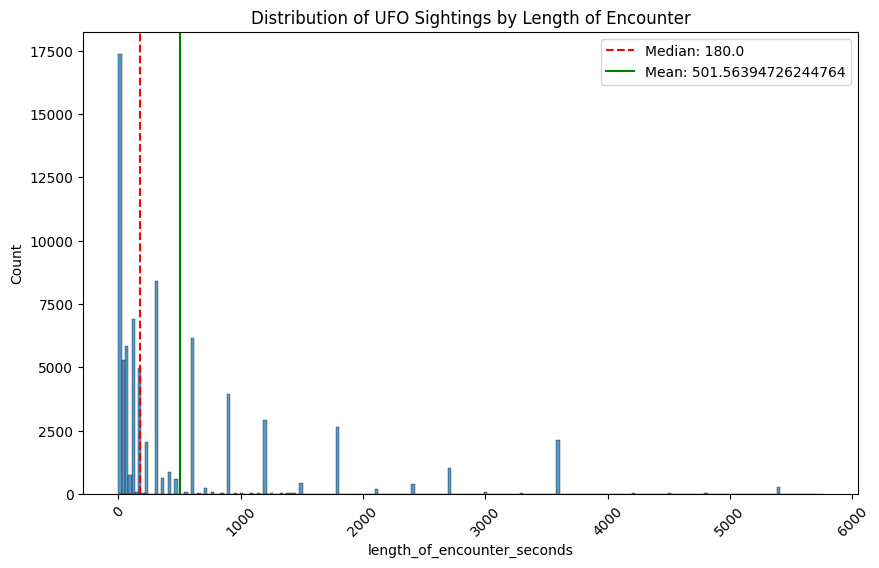

In [55]:
# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a histogram to show the distribution of the length of UFO sightings in seconds.
sns.histplot(Ml_df['length_of_encounter_seconds'])

# Calculating the median length of encounters and plotting a red dashed vertical line at this value.
median = Ml_df['length_of_encounter_seconds'].median()
plt.axvline(median, color='r', linestyle='--', label=f'Median: {median}')

# Calculating the mean length of encounters and plotting a green solid vertical line at this value.
mean = Ml_df['length_of_encounter_seconds'].mean()
plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean}')

# Rotating the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adding a title to the plot and displaying the legend.
plt.title('Distribution of UFO Sightings by Length of Encounter')
plt.legend()

# Displaying the plot.
plt.show()


## Analyzing the Duration of UFO Encounters

The histogram above depicts the lengths of UFO encounters, measured in seconds, providing insights into how long these sightings typically last.

### Observations

- The distribution is heavily right-skewed, with the majority of encounters being brief.
- The median duration of an encounter (marked by the red dashed line) is **180 seconds (3 minutes)**, which signifies that half of the reported encounters are 3 minutes or shorter.
- The mean duration (marked by the green solid line) is approximately **501.56 seconds (8 minutes and 21 seconds)**, which is significantly higher than the median due to the presence of some very long encounters. The number of very large encounters made it difficult to justify removing them all since they could hold valuable insights.

### Conclusion

The notable difference between the mean and median values indicates that while most encounters are short, there are a few reports with unusually long durations that raise the average. This skewness in the data could reflect different types of encounters or perhaps the way in which encounters are reported or recorded.

Understanding the duration of these encounters is critical for several reasons. It may influence the reliability of reports, with longer sightings potentially providing more details and therefore credibility. Additionally, it could help researchers prioritize cases for investigation, focusing on those with longer durations that might yield more substantial evidence.

In further analyses, we might consider examining the relationship between the duration of encounters and other variables such as UFO shape, time of day, or season, to see if there are any patterns or correlations that emerge. Such analysis can provide deeper insights into the nature of these sightings and help to formulate hypotheses about their causes.

Exploring some longer encounters myself I found that many UFO sightings report the UFO dancing around the sky for hours, meaning these reports should potentially not be removed from the investigation

As we proceed with our exploration, we must consider how to handle these outliers and whether they represent valuable data points or anomalies that could distort our predictive models.


<Figure size 1000x600 with 0 Axes>

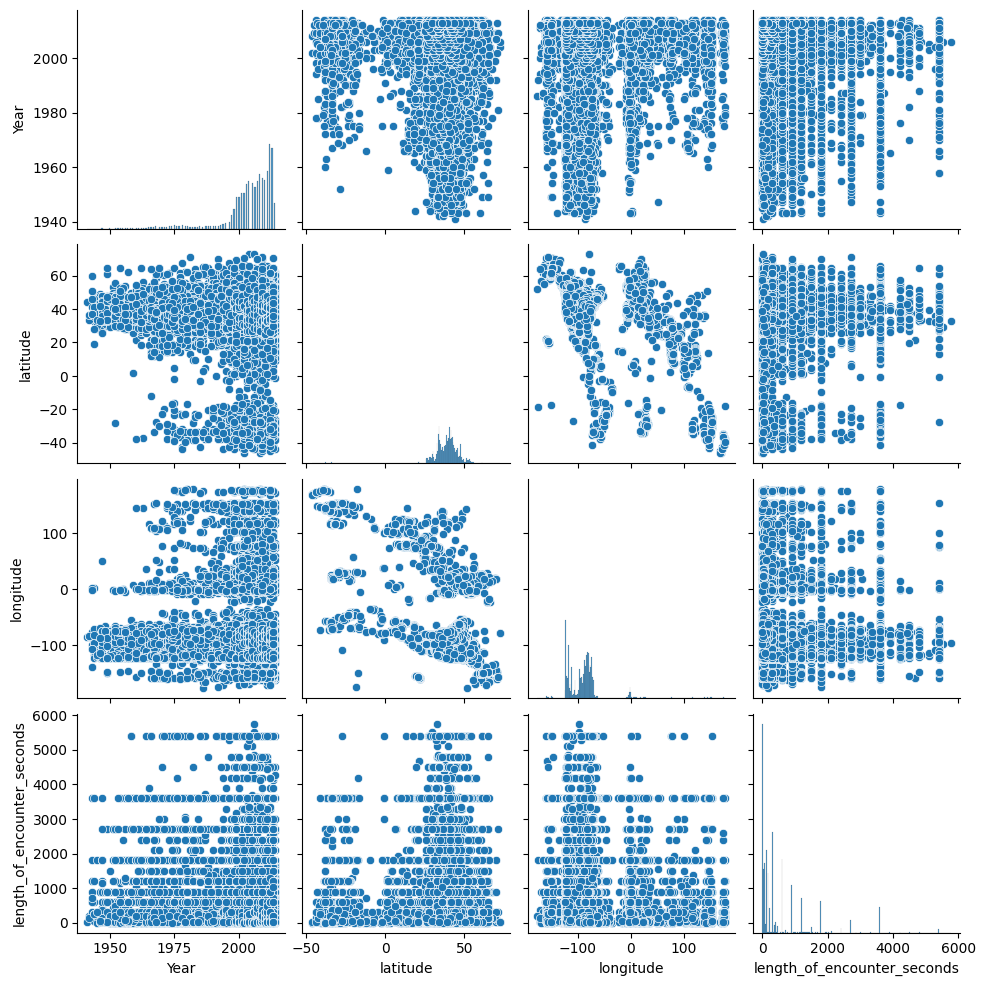

In [10]:
# Setting up the figure size for the plot.
plt.figure(figsize=(10,6))

# Creating a pairplot to visualize the pairwise relationships between selected features.
sns.pairplot(data = Ml_df[["Year","Season","latitude","longitude","length_of_encounter_seconds"]])

# Displaying the plot.
plt.show()

## Visualizing Multivariate Relationships in UFO Sightings Data

To understand the complex interdependencies between different variables in our UFO sightings dataset, we have utilized Seaborn's pairplot functionality to create a matrix of scatter plots.

### Observations

- The diagonal histograms provide the distribution of each variable, highlighting the skewness in the `length_of_encounter_seconds` variable, as previously discussed.
- Scatter plots between `latitude` and `longitude` show geographical clustering, which might reflect population density or reporting biases.
- The `Year` variable's plots indicate an increase in reports over time, as evidenced by the concentration of points towards the later years.

### Conclusion

This pairplot allows us to quickly ascertain correlations and distributions, guiding further, more specific analyses. For instance, we might want to investigate the clusters seen in the geographical scatter plots or explore why certain years have higher report frequencies. For example why is Africa almost entirely invisible on the latitude and longitude plot but North America is extremely visible.

Furthermore, these visual patterns could suggest hypotheses about underlying factors influencing UFO sighting reports, such as technological advancements in communication making it easier to report sightings in later years or geographical features that might make some regions more prone to reports.

Such exploratory data analysis is a critical step in any data science project, laying the groundwork for predictive modeling and deeper statistical examination. It's an intersection of art and science—using visual tools to uncover the stories data has to tell.

Next, we can consider more focused visualizations or statistical tests to confirm the patterns suggested by this pairplot, ultimately aiming to derive robust insights from the data.


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For preprocessing data (scaling, one-hot encoding)
from sklearn.compose import ColumnTransformer  # For creating transformers for different columns
from sklearn.pipeline import Pipeline  # For creating a pipeline of preprocessing steps

# Define categorical and numerical columns
categorical_cols = ["Season","UFO_shape"]
numerical_cols = ["Year", "Month", "Hour", "latitude", "longitude", "length_of_encounter_seconds"]

# Create transformers for one-hot encoding and standard scaling
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Define the complete preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
preprocessed_data = pipeline.fit_transform(Ml_df)


In [23]:

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(Ml_df, columns=categorical_cols, drop_first=True)

# Apply standard scaling to numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(Ml_df[numerical_cols])

# The df_encoded DataFrame now contains the preprocessed data


## Data Preprocessing for Machine Learning

Data preprocessing is a crucial step in the machine learning pipeline. It involves transforming raw data into an understandable format for subsequent analysis, ensuring that our machine learning algorithms can interpret the data correctly.

### First Approach: Using Pipelines

In our first approach, we use scikit-learn's `Pipeline` and `ColumnTransformer` to streamline the preprocessing. This technique allows us to build a composite estimator, chaining together different preprocessing steps. The result is a process that applies one-hot encoding to categorical variables and standard scaling to numerical variables in one go.

This method is particularly efficient when we want to ensure that our preprocessing steps are executed within cross-validation and grid search operations, maintaining the integrity of our train-test split and avoiding data leakage.

### Second Approach: Direct Encoding and Scaling

The second approach involves manually applying one-hot encoding and scaling to our data. We use pandas to create dummy variables for the categorical features and scikit-learn's `StandardScaler` for the numerical features. This method provides us with a transformed but dense DataFrame, which might be necessary for certain types of analysis or visualization that do not handle sparse matrices well.

### Why Two Approaches?

The choice between these two approaches may come down to the requirements of subsequent steps in our analysis. For instance I plan to use PCA (`Principal Component Analysis`), which does not support sparse matrix inputs by default, hence, we might opt for the second approach, as it provides a dense matrix suitable for such operations. We could use the pipeline with some additional steps, however, for ease I will be sticking with the second approach here.

By understanding the specifics of each technique and the format of data they produce, we can choose the appropriate preprocessing strategy for our needs, balancing efficiency and compatibility with downstream processes in our analysis.


In [43]:
from sklearn.cluster import KMeans  # For KMeans clustering algorithm
from sklearn.decomposition import PCA  # For Principal Component Analysis

# Preprocessing has already been performed at this stage, so we proceed with clustering.

# Initialize the KMeans clustering algorithm with 2 clusters and 20 initializations to ensure stability.
kmeans = KMeans(n_clusters=2, n_init = 20, random_state=42) 

# Fit the algorithm to the data and predict cluster labels for each sample.
cluster_labels = kmeans.fit_predict(df_encoded)

# PCA is used for dimensionality reduction, in this case, reducing the data to three dimensions for visualization.
# Apply PCA for dimensionality reduction.
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_encoded)

# Loadings are the weights assigned by PCA to each feature, showing their importance in each principal component.
# Get the loadings (component coefficients) for each feature in each PC
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=df_encoded.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Print the loadings
print(loadings_df)

# The explained variance ratio tells us how much variance is captured by each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance Ratio:", explained_variance_ratio)

# Visualize the clusters in 3D using plotly for interactivity
import plotly.express as px
from plotly.offline import plot

# We use plotly to create an interactive 3D scatter plot of the PCA results, colored by cluster labels.
fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2,
    color=cluster_labels,
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'}, 
    title='UFO Sightings Clustering (PCA)',
)

fig.update_traces(marker=dict(size=3))

# Save the plot with a custom name instead of the default 'temp-plot.html'.
plot(fig, filename='UFO_Sightings_Clustering_2.html')



         Year     Month      Hour  latitude  longitude  \
PC1 -0.021571 -0.091863 -0.050566 -0.704129   0.700865   
PC2 -0.669214  0.542886 -0.295122 -0.000873   0.038069   
PC3 -0.147675 -0.693809 -0.575448  0.045759  -0.097283   

     length_of_encounter_seconds  Season_Spring  Season_Summer  Season_Winter  \
PC1                    -0.002244       0.023528      -0.020839       0.020975   
PC2                     0.371696      -0.125700       0.078237      -0.081841   
PC3                     0.361558       0.128756      -0.020208       0.074290   

     UFO_shape_Chevron  ...  UFO_shape_Flash  UFO_shape_Formation  \
PC1          -0.000465  ...        -0.001313            -0.001064   
PC2          -0.000269  ...        -0.001636            -0.002862   
PC3          -0.001510  ...        -0.000178            -0.002328   

     UFO_shape_Light  UFO_shape_Other  UFO_shape_Oval  UFO_shape_Rectangle  \
PC1        -0.005930         0.001524        0.001963             0.000348   
PC2      

'UFO_Sightings_Clustering_2.html'

## Clustering and Dimensionality Reduction of UFO Sightings Data

### K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm used to find groups (clusters) in the data. In our case, we have used K-Means to classify UFO sightings into two distinct groups based on the preprocessed features. The algorithm identifies centroids for two clusters and assigns each data point to the nearest cluster.

## Justification for Using K-Means Clustering in UFO Sightings Analysis

- **Discovery of Patterns**: By grouping sightings into clusters, we can discern patterns that may not be apparent when looking at individual sightings. Clustering can highlight similarities in features such as geographic location, time, and characteristics of the sightings such as the shape of the UFO.

- **Credibility through Corroboration**: If multiple independent sightings share striking similarities and are grouped in the same cluster, it may lend more credibility to the reports. Similar reports from different witnesses can indicate recurring phenomena.

- **Understanding of Recurrences**: Clustering can reveal whether certain types of sightings tend to occur during specific times or seasons, which could suggest periodic visits or natural phenomena that recur under certain conditions. For example if many round UFO's are seen during Winter each year could this be a reoccuring visit or a natural phenomenon people are not aware of.

- **Focused Investigation**: Analysts can concentrate on particular clusters to investigate specific types of sightings more closely. For instance, a cluster of sightings that share unique characteristics might warrant a different investigative approach than a cluster of more common sightings.

In summary, K-Means clustering serves as a strategic tool in our exploratory data analysis, helping us to uncover underlying structures and potentially meaningful insights into UFO sightings reports. By identifying clusters, we aim to understand better the conditions under which these sightings occur and any common threads that connect them.


### Principal Component Analysis (PCA)

PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. Here, we've reduced the feature space to three dimensions (PC1, PC2, PC3), which can be visualized in a 3D scatter plot.

### Component Loadings

The loadings of a PCA are the correlation coefficients between the original variables and the principal components. They tell us how much each feature contributes to the direction of a principal component. This information is valuable for understanding the underlying structure of the data.

### Explained Variance Ratio

The explained variance ratio of each principal component indicates the proportion of the dataset's variance that lies along the axis of each principal component. In our analysis, the ratios suggest how much information is retained in the reduced dataset.

### Visualization with Plotly

We use Plotly to create an interactive 3D scatter plot to visualize the clusters formed by the K-Means algorithm, projected onto the principal components obtained from PCA. This visualization helps us understand the distribution and separation of the clusters in the reduced feature space.

### Insights

By combining K-Means clustering with PCA, we gain insights into the natural groupings within the UFO sightings data and reduce the number of dimensions to a manageable number for visualization. These techniques allow us to detect patterns and outliers that might warrant further investigation.

Through this process, we can begin to answer questions such as "Are there distinct types of UFO sightings?" or "Do sightings with similar characteristics tend to occur together?" This analysis serves as a stepping stone towards deeper explorations of the UFO sightings dataset.

## Detailed Insights from PCA Loadings and Clustering

The PCA loadings provide valuable insights into the data's structure. In our analysis:

- **PC1** has strong positive loadings for `longitude` and negative for `latitude`, indicating a differentiation in UFO sightings geographically.
- **PC2** is heavily weighted by the `Year`, `Month` and `length_of_encounter_seconds` factors, highlighting the importance of the duration of the sightings and time of sightings.
- **PC3** appears to focus even more on time-related variables, with `Month` and `Hour` showing significant inverse loadings.

The Explained Variance Ratios indicate that while no single component dominates the explanation of variance, the three combined capture a meaningful amount of information in the dataset. However, ideally we would like to capture closer to 70-80% of the variance but for the sake of simplicity in visualizing the data we will continue with the 3 components.

The 3D scatter plot from the clustering reveals:

- Two clusters differentiated possibly by geographic location and time-related features, as suggested by the PCA loadings.
- A visual representation of the clusters suggests that there might be some distinct patterns in the sightings that could be related to when and where they occurred.

The `UFO_Sightings_Clustering.html` visual is difficult to interpret and seperate any meaningful groupings from, so we will continue further with out analysis.

In conclusion, the PCA and clustering analysis has begun to uncover the underlying structure in the UFO sightings data, hinting at geographical and temporal factors as key differentiators. Further investigation into these clusters and their characteristics could yield more insights into UFO sighting reports.


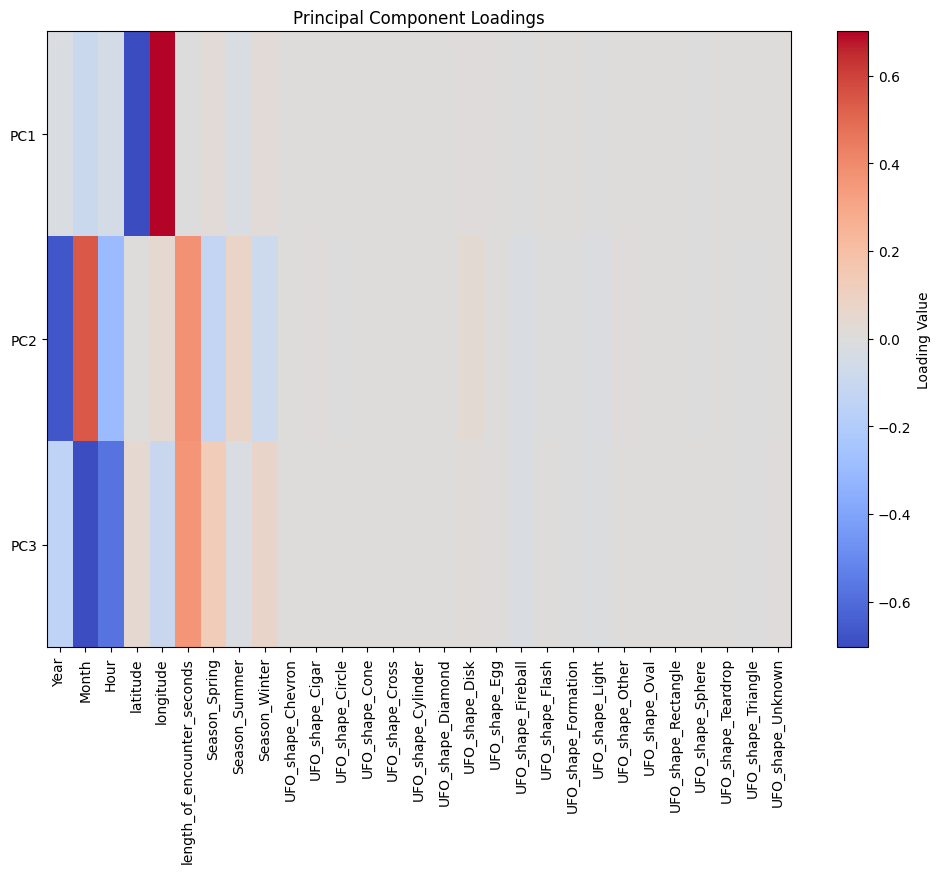

In [40]:
# 'loadings' and 'df_encoded' are already defined from the previous PCA step
# and 'loadings_df' is a DataFrame containing the loadings for visualization

# Plot the loadings using a heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(loadings_df, cmap='coolwarm', aspect='auto')

# Add a colorbar to show the loading value scale
plt.colorbar(heatmap, label='Loading Value')

# Set the x-ticks to be the names of the features from 'df_encoded'
plt.xticks(range(len(df_encoded.columns)), df_encoded.columns, rotation=90)

# Set the y-ticks to be the principal components
plt.yticks(range(len(loadings_df.index)), loadings_df.index)

# Add a title to the heatmap
plt.title('Principal Component Loadings')

# Display the plot
plt.show()


## Visualization of PCA Loadings

The heatmap above provides a visual interpretation of the principal component (PC) loadings. Each column represents a feature from our dataset, and each row represents a principal component. The color intensity indicates the magnitude and direction of a feature's contribution to a principal component. I have done this for the sake of further explaining what the PC's represent.

### Insights from the Heatmap:

- Features with strong red or blue values are the most influential in their respective principal components. For instance, if `latitude` and `longitude` show strong colors in PC1, they are crucial in forming this component.
- The loadings for PC1 indicate that geographical features (`latitude` and `longitude`) have significant weights, suggesting that location is a key factor in differentiating the sightings.
- PC2 seems to be heavily influenced by `Year`, `Month` and `length_of_encounter_seconds`, pointing out that the duration of sightings and time of sightings contributes significantly to this component.
- The influence of `Month` and `Hour` on PC3 could be capturing temporal aspects of sightings, such as the time of day or seasonality.

### Practical Application:

Understanding these loadings is essential as they help us determine which features most significantly affect the variance captured by the principal components. This, in turn, informs us about the underlying structure and patterns in the data, which can be invaluable for further analysis, including feature selection and engineering for machine learning models.


In [45]:
# Preprocessing (one-hot encoding and normalization)

# Initialize the KMeans clustering algorithm with 3 clusters now to see if more meaningful groups form, and 20 initializations to ensure stability.
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=42) 

# Fit the algorithm to the data and predict cluster labels for each sample. Please note we are using the data from the pipeline this time.
cluster_labels = kmeans.fit_predict(preprocessed_data)

# Apply PCA for dimensionality reduction to 3D (we have already done this but I want to show how it can be done for the pipeline data).
pca = PCA(n_components=3)
pca_result = pca.fit_transform( preprocessed_data.toarray()) # Conver the pipeline data to a dense format.

# We use plotly to create an interactive 3D scatter plot of the PCA results, colored by cluster labels.
fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2,
    color=cluster_labels,
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'},  # Customize axis labels
    title='UFO Sightings Clustering (PCA)',
)

fig.update_traces(marker=dict(size=3)) 

# Save and Open the plot in a separate browser window
plot(fig, filename='UFO_Sightings_Clustering_3.html')


'UFO_Sightings_Clustering_3.html'

## UFO Sightings Clustering Analysis with PCA

The interactive 3D scatter plot generated using PCA and K-Means clustering reveals three clusters among UFO sightings:

- **Cluster 2 (Yellow)**: This cluster primarily consists of sightings with high values in PC1, this suggests these sightings tend to be quite eastern (large longitude values) and/or southern (low or negative latitude values). This makes sense as to why there is so little sightings in this group as we saw earlier most of our sightings were western and northern. There is also a large spread in PC2 which means there is little account here for year or month reported. The lower PC3 value could be due to later months or times of day when the sighting was reported but it is difficult to say, however, this could make sense given this would involve a lot of Sourthern countries sightings which have summer and clear skies during the later months in the year and as we saw earlier most sightings are during December.

- **Cluster 1 (Reddish)**: This cluster primarily consists of sightings with low values in PC1, this suggests these sightings tend to be quite western (low or negative longitude values) and/or northern (larger latitude values). This makes sense as to why there is so much concentration of sightings in this group as we saw earlier most of our sightings were western and northern. There is also a large spread in PC3 which means there is little account here for month or hour reported. The lower PC2 value could also indicate a split forming where these sightings tend to be more recent (larger yearly value) than sightings in cluster 0.

- **Cluster 0 (Blue)**: This cluster primarily consists of sightings with low values in PC1, this suggests these sightings tend to be quite western (low or negative longitude values) and/or northern (larger latitude values). This makes sense as to why there is so much concentration of sightings in this group as we saw earlier most of our sightings were western and northern. There is also a large spread in PC3 which means there is little account here for month or hour reported. The larger PC2 value could also indicate a split forming where these sightings tend to be reported earlier (smaller yearly value) than sightings in cluster 0.

### Explained Variance Ratio:

The explained variance ratio of the three principal components provides insight into how much information is captured by each component:

- **PC1**: Captures 18.5% of the variance, reflecting the importance of geographic location.
- **PC2**: Captures 14.6% of the variance, highlighting the significance of the sighting's year, month and length of encounter.
- **PC3**: Captures 14.2% of the variance, pointing to the diverse timing of sightings.

### Interpretation of Clusters:

- **Cluster 2's** dominance in PC1 and low variance in PC3 suggests these sightings could be tied to specific locations and maybe more dependence on time.
- **Cluster 1's** dominance in PC1 and high variance in PC3 suggests these sightings could be tied to specific locations regardless of time of year. The low variability in PC2 suggests potentially specific years of reporting.
- **Cluster 0's** dominance in PC1 and high variance in PC3 suggests these sightings could be tied to specific locations regardless of time of year. The low variability in PC2 suggests potentially specific years of reporting.

Through this PCA clustering, we can infer potential characteristics of UFO sightings and their occurrences. Further analysis could delve into the specifics of these clusters to understand the conditions under which these sightings are reported.

However, nothing new has been found here since we did expect the biggest split would be the geographic regions and year of reporting, which is what seems to be causing the groupings here. We will check this further now.


Cluster
0    49660
1    24103
2     1231
Name: count, dtype: int64


Silhouette Score: 0.163


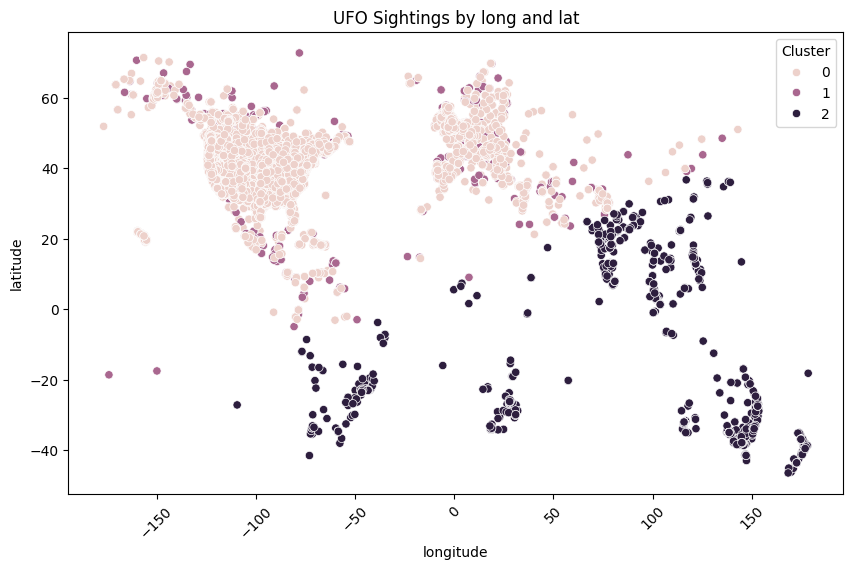

In [61]:
# The cluster labels generated from KMeans are being assigned to the original DataFrame.
# This allows for the integration of cluster analysis with the existing dataset, enabling visualization and further analysis.
Ml_df["Cluster"] = cluster_labels

# Printing the number of sightings in each cluster gives a quick overview of the distribution of data points among the generated clusters.
# It helps in understanding the relative size of each cluster.
print(Ml_df["Cluster"].value_counts())

from sklearn.metrics import silhouette_score

# The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.
# The value ranges from -1 for incorrect clustering to +1 for highly dense clustering.
# A score around zero indicates overlapping clusters.
# In our case, the silhouette score is a metric to evaluate the validity of the KMeans clustering operation.
score = silhouette_score(df_encoded, cluster_labels)

print('Silhouette Score: %.3f' % score)


plt.figure(figsize=(10,6))
# Visualize the clusters on a scatter plot based on longitude and latitude.
sns.scatterplot(data=Ml_df, x='longitude', y= "latitude", hue = "Cluster")
# Rotating the x-axis labels for better readability.
plt.xticks(rotation=45)
plt.title('UFO Sightings by long and lat')
plt.show()

## Geographical Context of UFO Sightings Clusters

Our clustering analysis has provided insights into the geographical distribution of UFO sightings:

- **Cluster 2 (Black)**: This cluster is predominantly composed of sightings in the Eastern and Southern Hemispheres. This aligns with the high PC1 values from our PCA analysis and confirms our earlier observations about the geographical distribution of these sightings.

- **Clusters 0 and 1 (Dark Purple and Light Purple)**: Representing the Western and Northern Hemispheres, these clusters confirm the observations from the PCA that a significant number of sightings are concentrated in these areas. The scatterplot does not reveal any distinct pattern within these clusters based on longitude and latitude alone, suggesting that other factors, such as the year of reporting, may be influencing the difference in these two clusters.

### Silhouette Score:

With a silhouette score of 0.163, the clustering result indicates weak separation between the clusters. While there is some distinction, the score implies that there is much room for refinement, possibly by incorporating additional features or exploring different clustering algorithms. Ideally we would want a score of 0.5 or more.

## Understanding the Silhouette Score

The silhouette score is a metric used to calculate the effectiveness of the clustering algorithm. It measures how similar each point in a cluster is to the points in its own cluster versus those in the nearest cluster. This metric provides insight into the distance between the resulting clusters.

A higher silhouette score indicates that points are, on average, closer to the points in their own cluster than to those in the nearest cluster, which is desirable. The score ranges from -1 to +1, where:

- A score close to +1 indicates that the clusters are well-separated and clearly defined.
- A score close to 0 suggests that the clusters are overlapping and not distinctly separated.
- A score close to -1 indicates that points have been assigned to the wrong clusters.

### Insights from the Visualization:

The scatterplot 'UFO Sightings by long and lat' further substantiates the divide between sightings in the eastern/southern and western/northern regions. However, it does not reveal any new patterns that were not already suggested by the PCA.

### Conclusion:

The clustering analysis, supported by the geographical visualization, reinforces the significance of the location and timing of UFO sightings. Although the silhouette score indicates that the clusters are not highly distinct, the geographical distribution is clear. Further exploration, perhaps considering more features such as the description of the encounter and making use of a language model, could provide additional clarity and potentially uncover more nuanced patterns within the data.


In [49]:
# Utilize Plotly Express to create a 3D scatter plot, which is an excellent tool for visualizing multi-dimensional data.
# Here we are mapping longitude, latitude, and Year to the three axes, providing a clear view of the temporal and spatial distribution of sightings.
fig = px.scatter_3d(
    Ml_df,
    x='longitude',
    y='latitude',
    z='Year',
    color='Cluster',  # The cluster assignment is used to color the data points, distinguishing the groups.
    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'Year': 'Year'},
    title='UFO Sightings by Longitude, Latitude, and Year'
)

fig.update_traces(marker=dict(size=3))
plot(fig, filename='UFO_Sightings_Temporal_Spatial_Distribution.html')


'UFO_Sightings_Temporal_Spatial_Distribution.html'

## Temporal and Spatial Distribution of UFO Sightings

The interactive 3D scatter plot titled 'UFO Sightings by Longitude, Latitude, and Year' presents a comprehensive view of the UFO sightings data across both spatial and temporal dimensions.

### Insights from the Visualization:

- **Temporal Trends**: The vertical axis representing the year of the sightings indicates a clear temporal trend. Cluster 0 (Dark Blue) is more concentrated in the earlier years, from around 1940 to the 1990s, suggesting that these sightings were reported earlier. Cluster 1 (Light purple/red) shows more recent reports, with sightings occurring closer to the current year. This suggests that the year of reporting is a significant factor in distinguishing these clusters, which is what we expected from our previous analysis.

- **Geographic Distribution**: Cluster 2 (Yellow) is dispersed across the latitude and longitude axes but does not show a particular trend in the year axis, implying that the time of reporting does not significantly influence the classification of these sightings. Instead, this cluster seems to be almost entirely defined by its geographic characteristics, as we saw before.

- **Possible Influence of Month**: Although the year of reporting provides some separation between clusters 0 and 1, it does not account for all the variability, indicating that other temporal factors, such as the month of reporting, may also influence the clustering. This influence suggests that certain times of the year could be more conducive to reporting UFO sightings, or there could be seasonal patterns in the occurrences of these events.

### Conclusion:

The figure 'UFO Sightings by Longitude, Latitude, and Year' reinforces the earlier findings that geographical location and the year of reporting are instrumental in grouping UFO sightings. The additional influence of the month on Clusters 0 and 1 might point to a seasonal aspect of sightings not previously considered. This seasonality could warrant further investigation to understand its role in the clustering of UFO sightings.

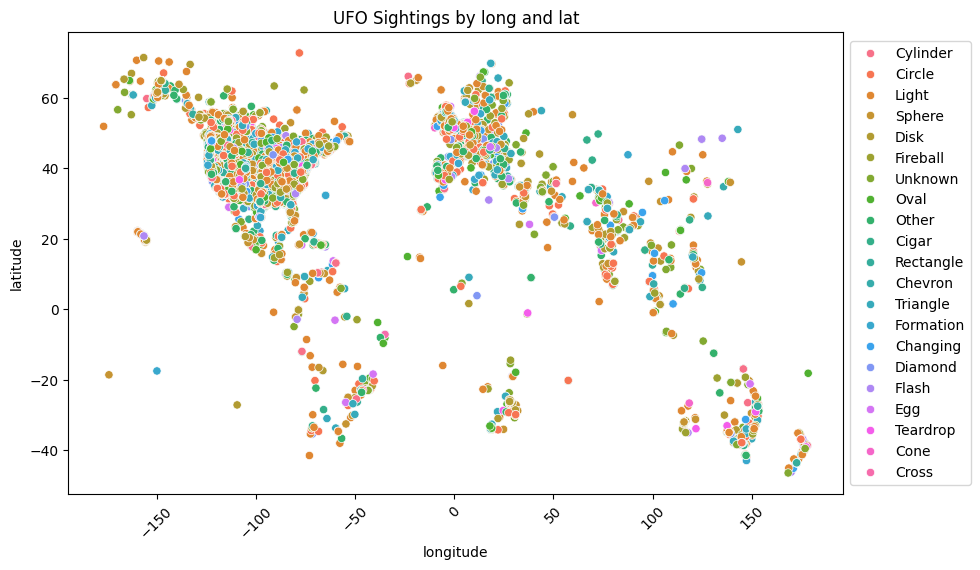

In [50]:
# Set up the figure size for the scatter plot.
plt.figure(figsize=(10,6))

# Create a scatter plot with longitude and latitude on the axes.
# The 'hue' parameter categorizes the data points by the 'UFO_shape' column,
# which allows us to see if certain shapes are reported more frequently in specific areas.
sns.scatterplot(data=Ml_df, x='longitude', y= "latitude", hue = "UFO_shape")

# Rotate the x-axis labels to ensure they are legible.
plt.xticks(rotation=45)

plt.title('UFO Sightings by long and lat')

# Adjust the legend to avoid overlapping the plot by positioning it to the side.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Geographical Distribution of UFO Shapes

The scatter plot 'UFO Sightings by long and lat' depicts the global distribution of UFO sightings with a color-coded representation of the shapes reported.

### Insights from the Visualization:

- There does not appear to be a single shape that is predominantly reported in one area over another, indicating that sightings of different shapes occur across various geographical locations.
- Certain shapes, such as lights, seem to be reported more frequently across the board, possibly due to their generic descriptors which may be applied to a wide range of observed phenomena. We also noticed this earlier in our analysis

### Interpretation of the Distribution:

The diverse spread of UFO shapes reported at all longitudes and latitudes may suggest that cultural factors or individual interpretation do not play as significant a role in how these sightings are reported and described as I initially expected. This is because the data does not show a clear pattern of specific UFO shapes being sighted in particular regions, which might have been expected if certain shapes were associated with specific natural phenomena or man-made objects prevalent in those areas.

### Concluding Thoughts:

While the sightings' geographical spread is quite extensive, the lack of a distinct pattern in shapes across regions points to the complexity and subjective nature of UFO sightings reporting. This visualization underscores the importance of considering the variety of shapes reported in any comprehensive study of UFO sightings. It also opens up questions about the reliability and interpretation of these sightings, which could be explored in further research.

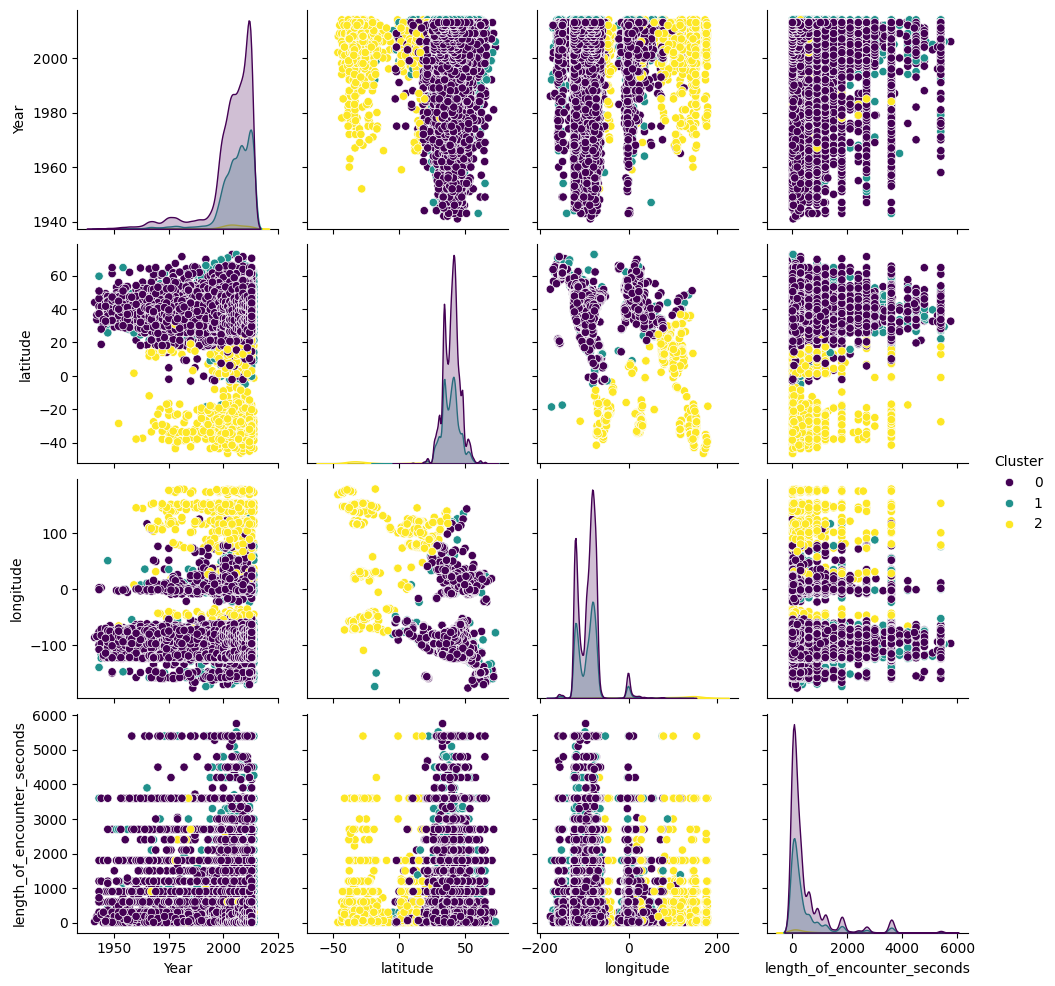

In [52]:
# Creating a pairplot to explore the relationships between different features ('Year', 'Season', 'latitude',
# 'longitude', 'length_of_encounter_seconds') and how these relationships are differentiated by cluster assignment.
sns.pairplot(data = Ml_df[["Year","Season","latitude","longitude","length_of_encounter_seconds", "Cluster"]],
             hue="Cluster", palette="viridis")
plt.show()

## Multivariate Analysis of UFO Sightings Clusters

The pairplot visualization, composed of multiple scatter plots, provides a multifaceted view of the UFO sightings data with respect to several key features that we explored earlier. This allows for a more consolidated view of our earlier findings.

### Key Observations:

- **Temporal Spread**: The scatter plots that include the Year show an increasing spread of UFO sightings over time, with more recent years exhibiting a broader global distribution. This could indicate either an actual increase in sightings or an increase in reporting due to factors such as heightened public interest or more accessible reporting channels.

- **Geographic Clustering**: The latitude and longitude scatter plots reinforce the clustering patterns based on geographic location, with certain clusters being more prevalent in specific areas. This is consistent with our earlier findings and suggests that geography plays a significant role in the reporting of UFO sightings.

- **Encounter Duration**: The plots involving the length of the encounter show that this feature does not have a strong clustering effect. Sightings of varying durations are present within all clusters, indicating that the encounter length alone is not a significant factor in grouping sightings.

### Cluster-Specific Trends:

- **Cluster 2 (Yellow)** shows a consistent presence across all years, suggesting a steady rate of sightings over time that is not influenced by the reporting year.
- **Clusters 0 and 1** show a difference in the distribution of years, with one being more present in earlier years and the other in more recent years, implying a temporal evolution in the reporting or occurrence of sightings.

### Conclusion:

The pairplot analysis has highlighted the complexity of the UFO sightings dataset, with geographic and temporal factors being influential in the clustering process. While encounter duration appears to be a less significant feature, the time and location of the sightings show distinct patterns that merit further investigation. This multivariate approach underscores the need to consider multiple factors simultaneously when analyzing UFO sightings and may lead to more nuanced understandings of the phenomena reported.


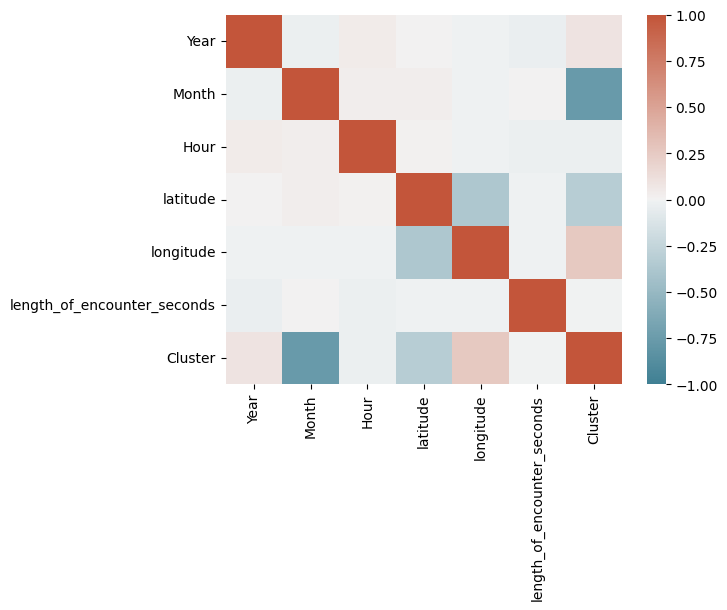

In [62]:
import numpy as np

# The DataFrame method 'select_dtypes' is used to create a new DataFrame 'numeric_cols' 
# that includes only columns with numeric data.
numeric_cols = Ml_df.select_dtypes(include=[np.number])

# The 'corr' method of DataFrame computes the correlation matrix for these numeric columns.
correlation_matrix = numeric_cols.corr()

# 'sns.diverging_palette' function is called with the parameters 220 and 20 to create a custom 
# diverging color palette that ranges from a deep red to a deep blue.
red_blue = sns.diverging_palette(220, 20, as_cmap=True)

# The 'heatmap' function from seaborn library is used to plot the correlation matrix 'correlation_matrix'.
# The color map 'red_blue' is applied to indicate the strength and direction of correlations.
# Values close to 1 or -1 are strong correlations (positive and negative, respectively),
# and values close to 0 are weak correlations.
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=red_blue)

plt.show()


## Comprehensive Analysis Conclusion

Over the course of our analysis, we have delved into a UFO sightings dataset and explored various aspects of the data, from geographical distributions to temporal trends and clustering patterns.

### Summarization of Key Findings:

- **Geographical Patterns**: We observed clusters when visualizing sightings by location, with certain regions reporting more sightings.
- **Temporal Insights**: Our analysis highlighted an increase in sightings over time, with recent years showing a broader geographical spread of reports.
- **Shape Variations**: The diversity in UFO shapes reported did not show a clear geographical trend, indicating that sightings descriptions are varied and widespread.
- **Clustering Analysis**: Applying K-Means clustering allowed us to group sightings into clusters based on similarities in features. We found clusters that represented both temporal and geographical groupings.
- **Correlation Analysis**: The heatmap of the correlation matrix revealed a strong negative correlation between `Cluster` and `Month` which we did not pick up on before. This indicates that later months are associated with lower clusters.

### Overall Conclusion:

Our analysis has shown that these events are complex phenomena with multifaceted patterns. While some clear trends have emerged, such as the influence of geographic location and time on sightings, other aspects like the shape of UFOs appear to be more randomly distributed and not tied to specific regions or periods.

This exploratory analysis serves as a foundation for further study. Future research could aim to incorporate additional variables, apply different clustering algorithms, or use more sophisticated statistical techniques to unravel the deeper stories within this intriguing dataset. Perhaps we should make use of lanaguage models in the future to make use of the descriptions.

By carefully considering the multifaceted nature of UFO sightings and acknowledging the limits of our current analysis, we remain open to new interpretations and findings that future data may unveil.

Though not much new insights were discovered, I still enjoyed this afternoon exploring the UFO dataset